## Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Importing the data

In [2]:
# loading the data from csv file to pandas dataframe

df= pd.read_csv("/content/drive/MyDrive/datasets/vehicle-dataset-from-cardekho/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# checking the number of rows and columns
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# checking the distribution of categorical data
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
# label encoding the categorical data
df = df.replace({
    'Fuel_Type':{
        'Petrol': 0,
        'Diesel': 1,
        'CNG': 2
    },
    'Seller_Type':{
        'Dealer':0,
        'Individual': 1
    },
    'Transmission':{
        'Manual': 0,
        'Automatic': 1
    }
})
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [10]:
#  Splitting the data into training and testing split

x = df.drop(["Car_Name","Selling_Price"], axis=1)
y = df["Selling_Price"]

x.shape, y.shape

((301, 7), (301,))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

x_train.shape, y_test.shape

((240, 7), (61,))

In [12]:
# Training the model
model = LinearRegression()

In [13]:
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# Evaluating the model

# prediction on training data itself
x_train_pred = model.predict(x_train)
metrics.r2_score(y_train, x_train_pred)

0.8781010640641523

In [15]:
# predictions on testing data
x_test_pred = model.predict(x_test)
metrics.r2_score(y_test, x_test_pred)

0.8701522332152006

Text(0, 0.5, 'Predicted Price')

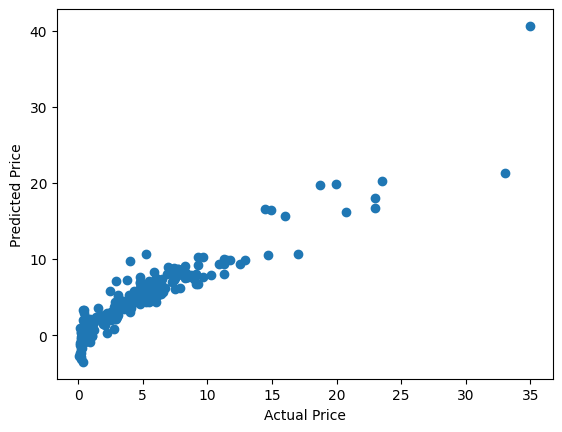

In [16]:
plt.scatter(y_train, x_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

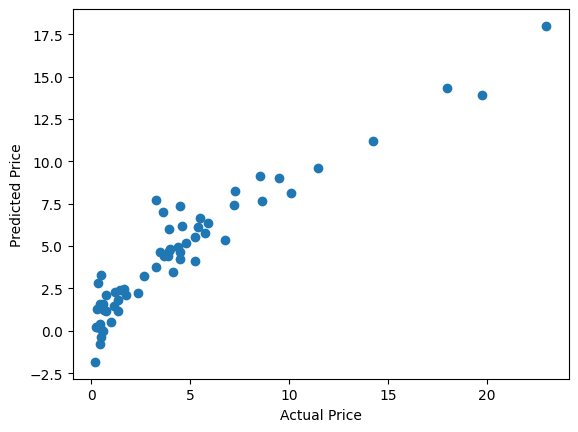

In [17]:
plt.scatter(y_test, x_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [18]:
# Training the model
model2 = Lasso()

In [19]:
model2.fit(x_train, y_train)

Lasso()

In [20]:
# Evaluating the model

# prediction on training data itself
x_train_pred = model2.predict(x_train)
metrics.r2_score(y_train, x_train_pred)

0.8387147237492207

In [21]:
# predictions on testing data
x_test_pred = model2.predict(x_test)
metrics.r2_score(y_test, x_test_pred)

0.8555537906659401

Text(0, 0.5, 'Predicted Price')

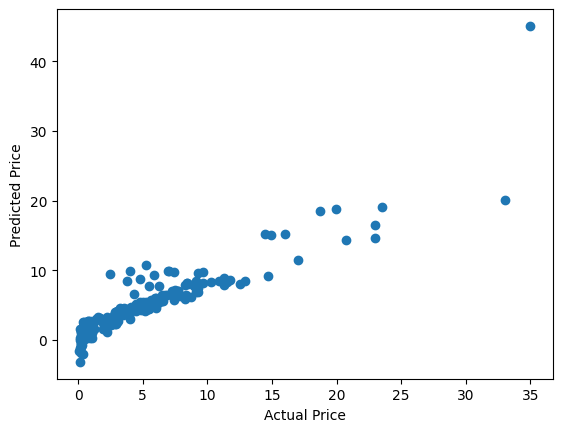

In [22]:
plt.scatter(y_train, x_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

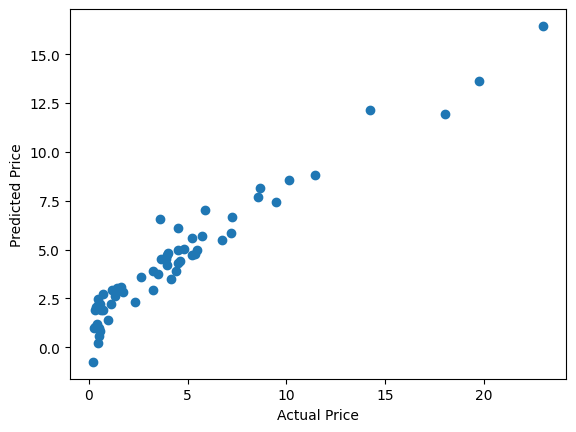

In [23]:
plt.scatter(y_test, x_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [24]:
input = {
"Year":[2014],
"Present_Price":[5.59],
"Kms_Driven":[27000],
"Fuel_Type":[0],
"Seller_Type":[0],
"Transmission":[0],
"Owner":[0],
}
input_pd = pd.DataFrame(input)
input_pd = input_pd.replace({
    'Fuel_Type':{
        'Petrol': 0,
        'Diesel': 1,
        'CNG': 2
    },
    'Seller_Type':{
        'Dealer':0,
        'Individual': 1
    },
    'Transmission':{
        'Manual': 0,
        'Automatic': 1
    }
})
model.predict(input_pd)

array([3.86803217])

In [25]:
import pickle

pickle.dump({
    'Fuel_Type':{
        'Petrol': 0,
        'Diesel': 1,
        'CNG': 2
    },
    'Seller_Type':{
        'Dealer':0,
        'Individual': 1
    },
    'Transmission':{
        'Manual': 0,
        'Automatic': 1
    }
}, open("replace.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))